<a href="https://colab.research.google.com/github/mirchandani-mohnish/ClusterMetrics/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN




## Loading the Iris Dataset


In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
df['target'] = iris.target
df['species'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Figure size 1500x1500 with 0 Axes>

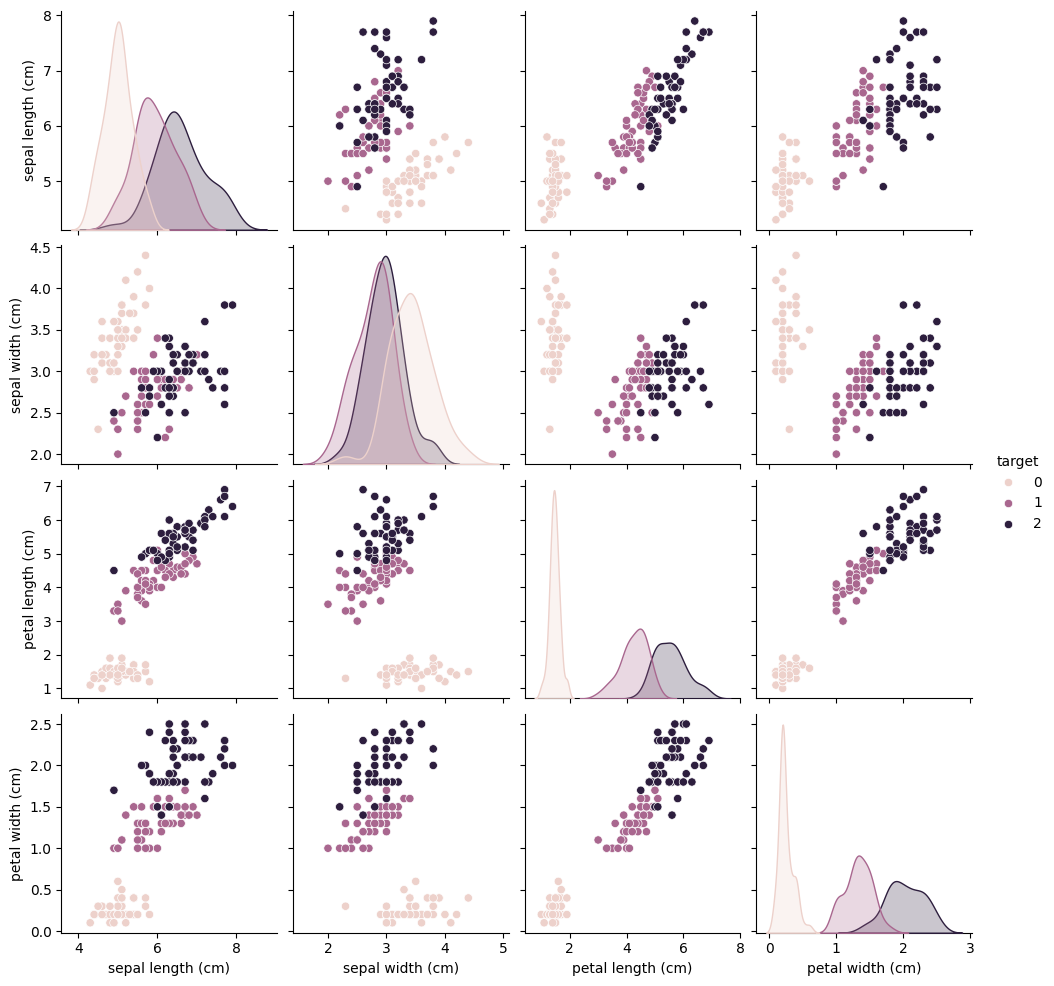

In [27]:


plt.figure(figsize=(15, 15))
sns.pairplot(df, hue='target')
plt.show()

In [35]:
eps = 0.5
min_samples = 5

dbscan_clustering = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_clustering.fit(df.drop(['target', 'species'], axis=1))
dbscan_predictions = dbscan_clustering.labels_

print(dbscan_predictions)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


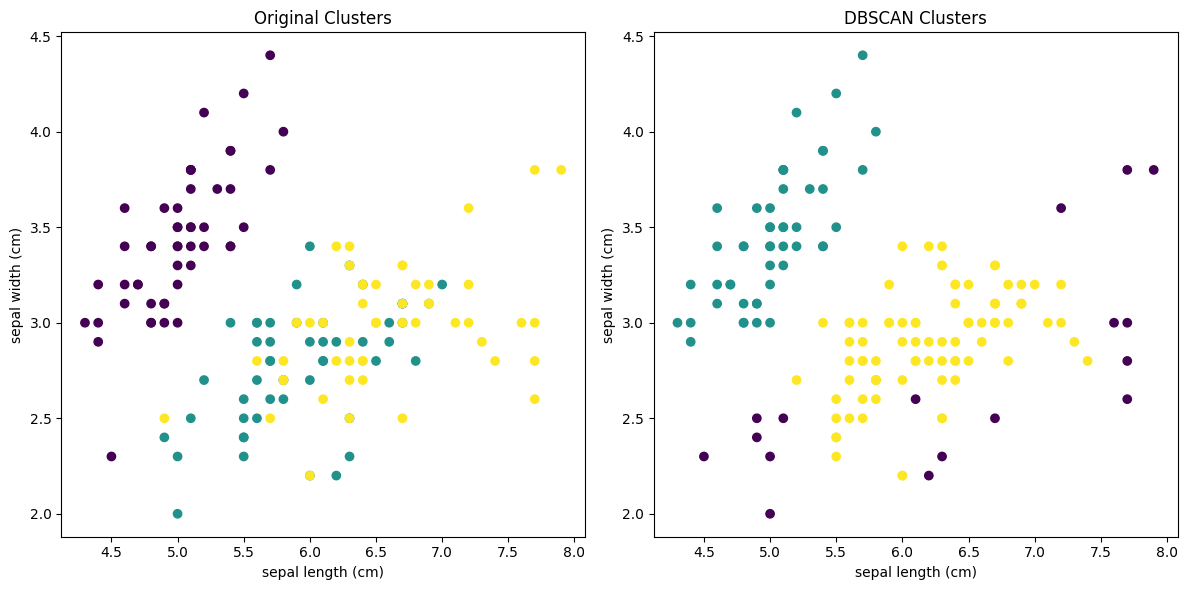

In [47]:
plt.figure(figsize=(12, 6))

# Plot original clusters
plt.subplot(1, 2, 1)
# plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(df.drop(['species'], axis=1).iloc[:, 0], df.drop(['species'], axis=1).iloc[:, 1], c=df['target'])

plt.title('Original Clusters')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
# plt.scatter(X[:, 0], X[:, 1], c=y_db, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(df.drop(['target', 'species'], axis=1).iloc[:, 0], df.drop(['target', 'species'], axis=1).iloc[:, 1], c=dbscan_predictions)
plt.title('DBSCAN Clusters')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.tight_layout()
plt.show()

UnboundLocalError: cannot access local variable 'colors' where it is not associated with a value

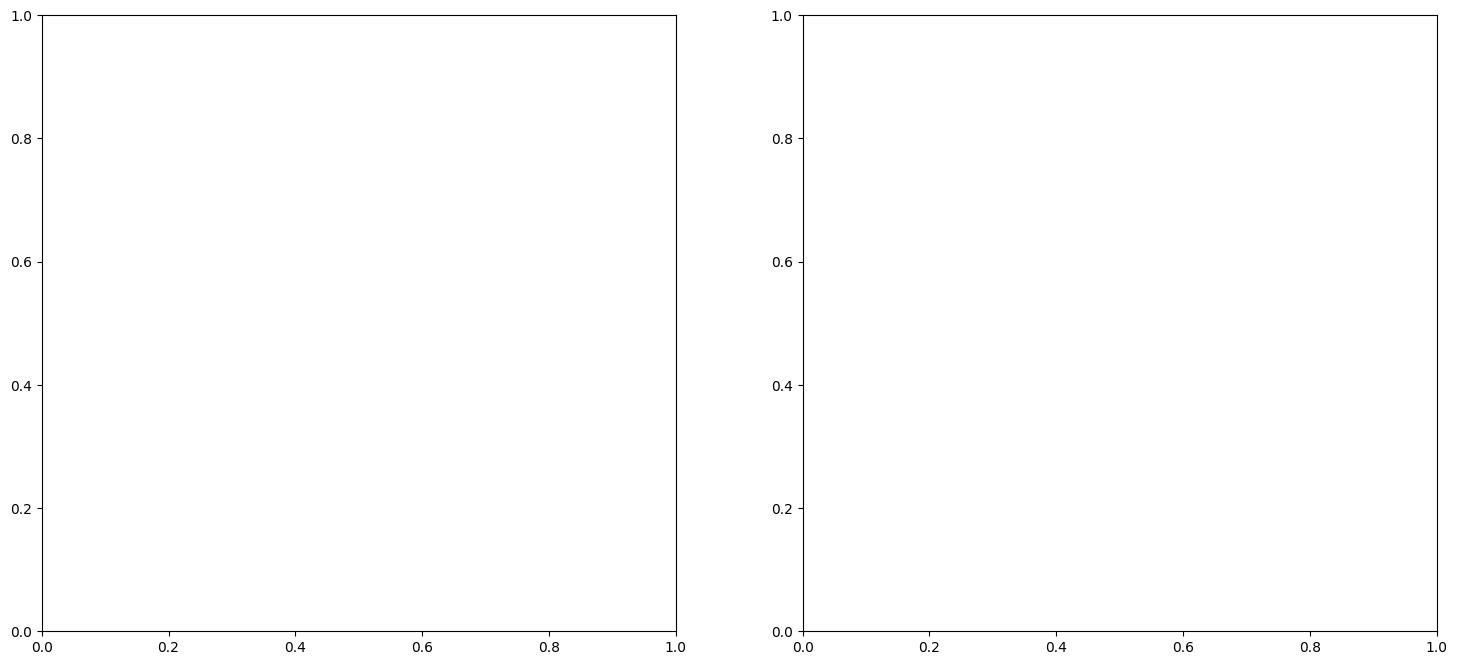